# Load LGMR data

In [61]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)


# Load the LGMR classes mask
# read the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

# Load TraCE all

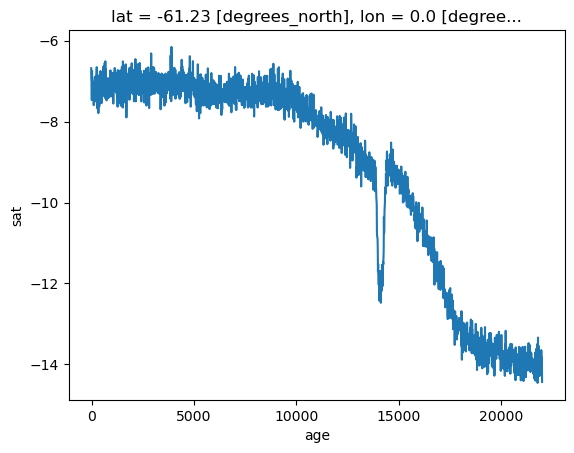

In [62]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]

ds_trace=ds

ds_trace['sat'].isel(lat=7, lon=0).plot()


# # read the TraCE_weighted_avg_LGMR_mask.pkl
# import pickle
# with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'rb') as f:
#     TraCE_weighted_avg_LGMR_mask = pickle.load(f)

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


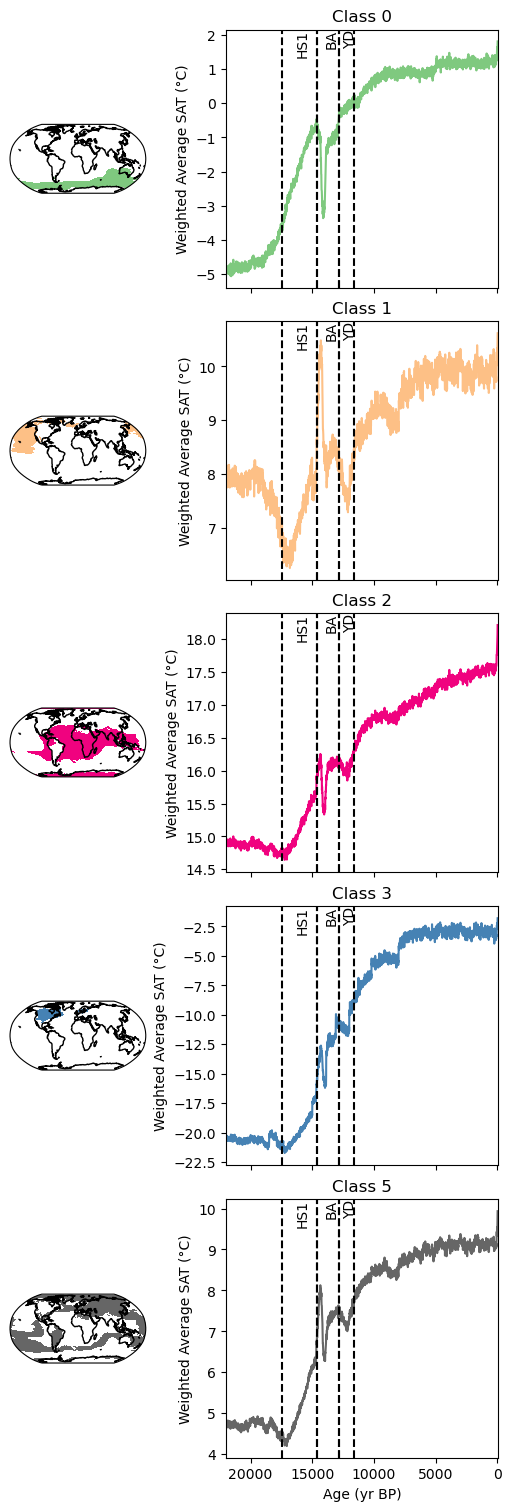

In [63]:
import xarray as xr
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gfs
import importlib
importlib.reload(gfs)



# Define the new grid to interpolate to (using ds_sat's grid)
new_lat = ds_sat.lat
new_lon = ds_sat.lon

# Perform the interpolation
ds_trace_interpolated = ds_trace.interp(lat=new_lat, lon=new_lon, method='linear') # there will be nan values in the interpolated data as the spatial extend of LGMR data is larger than the TraCE data
ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
ds_trace_interpolated['class_relabeled_checked']=(('lat', 'lon'), label_check.reshape(96,144))

# 1. Center the Data
ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

# 2. Weight the Data
ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)


TraCE_all_weighted_avg_LGMR_mask=gfs.plot_weighted_average_curve(ds_trace_interpolated.copy(),label_var_name='class_relabeled_checked', dpi=100)




# Load TraCE GHG

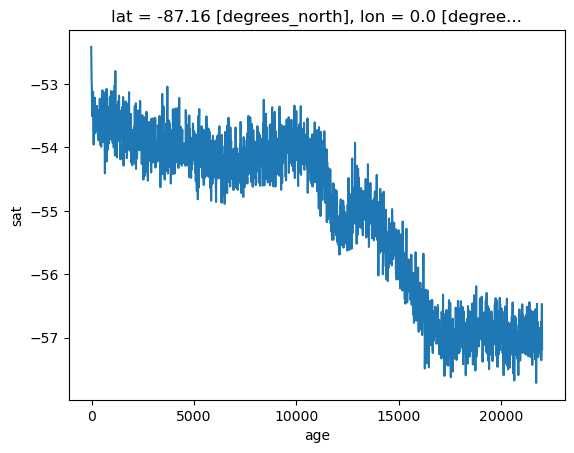

In [64]:
import xarray as xr

# import .nc data
ds_trace_ghg = xr.open_dataset('data_fig3/b30.00_4kaDVTk.cam2.ncrcat.ann.nc')

# rename the TREFHT to sat
ds_trace_ghg = ds_trace_ghg.rename({'TREFHT': 'sat'})
# rename the time to age
ds_trace_ghg = ds_trace_ghg.rename({'time': 'age'})
# multiply age by 1000
ds_trace_ghg['age'] = ds_trace_ghg['age'] * -1000

# convert the sat to degrees C
ds_trace_ghg['sat'] = ds_trace_ghg['sat'] - 273.15

ds_trace_ghg = ds_trace_ghg[['sat']]

# plot a record from the ds_sat at given lat and lon
ds_trace_ghg['sat'].isel(lat=0, lon=0).plot()

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


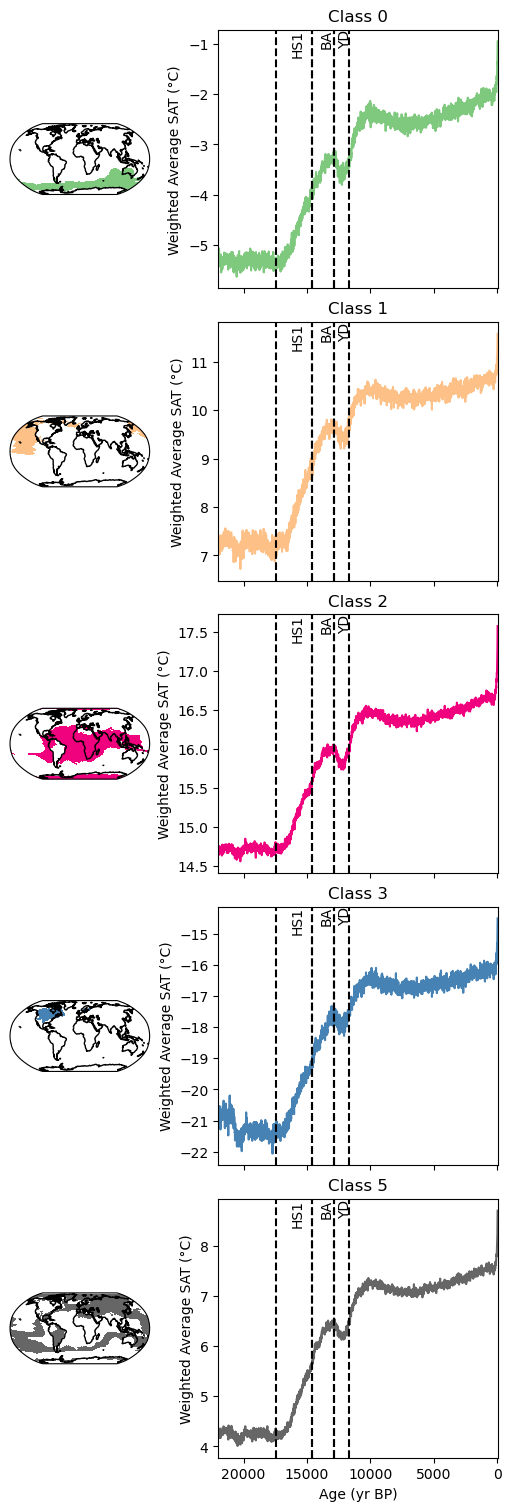

In [65]:
import xarray as xr
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gfs
import importlib
importlib.reload(gfs)



# Define the new grid to interpolate to (using ds_sat's grid)
new_lat = ds_sat.lat
new_lon = ds_sat.lon

# Perform the interpolation
ds_trace_interpolated = ds_trace_ghg.interp(lat=new_lat, lon=new_lon, method='linear') # there will be nan values in the interpolated data as the spatial extend of LGMR data is larger than the TraCE data
ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
ds_trace_interpolated['class_relabeled_checked']=(('lat', 'lon'), label_check.reshape(96,144))

# 1. Center the Data
ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

# 2. Weight the Data
ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)


TraCE_ghg_weighted_avg_LGMR_mask=gfs.plot_weighted_average_curve(ds_trace_interpolated.copy(),label_var_name='class_relabeled_checked', dpi=100)




# Load TraCE Orb

Ref: He et al., 2011, SIMULATING TRANSIENT CLIMATE EVOLUTION OF THE LAST DEGLACIATION WITH CCSM3

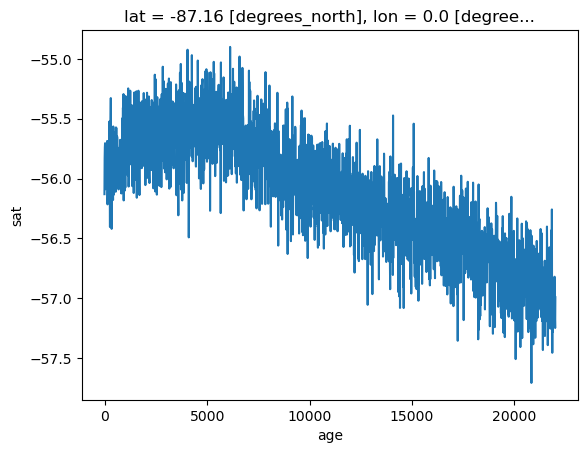

In [66]:
import xarray as xr

# import .nc data
ds_trace_orb = xr.open_dataset('TraCE_data/b30.00_4kaDVTj.cam2.ncrcat.ann.nc')

# rename the TREFHT to sat
ds_trace_orb = ds_trace_orb.rename({'TREFHT': 'sat'})
# rename the time to age
ds_trace_orb = ds_trace_orb.rename({'time': 'age'})
# multiply age by 1000
ds_trace_orb['age'] = ds_trace_orb['age'] * -1000

# convert the sat to degrees C
ds_trace_orb['sat'] = ds_trace_orb['sat'] - 273.15

ds_trace_orb = ds_trace_orb[['sat']]

# plot a record from the ds_sat at given lat and lon
ds_trace_orb['sat'].isel(lat=0, lon=0).plot()

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


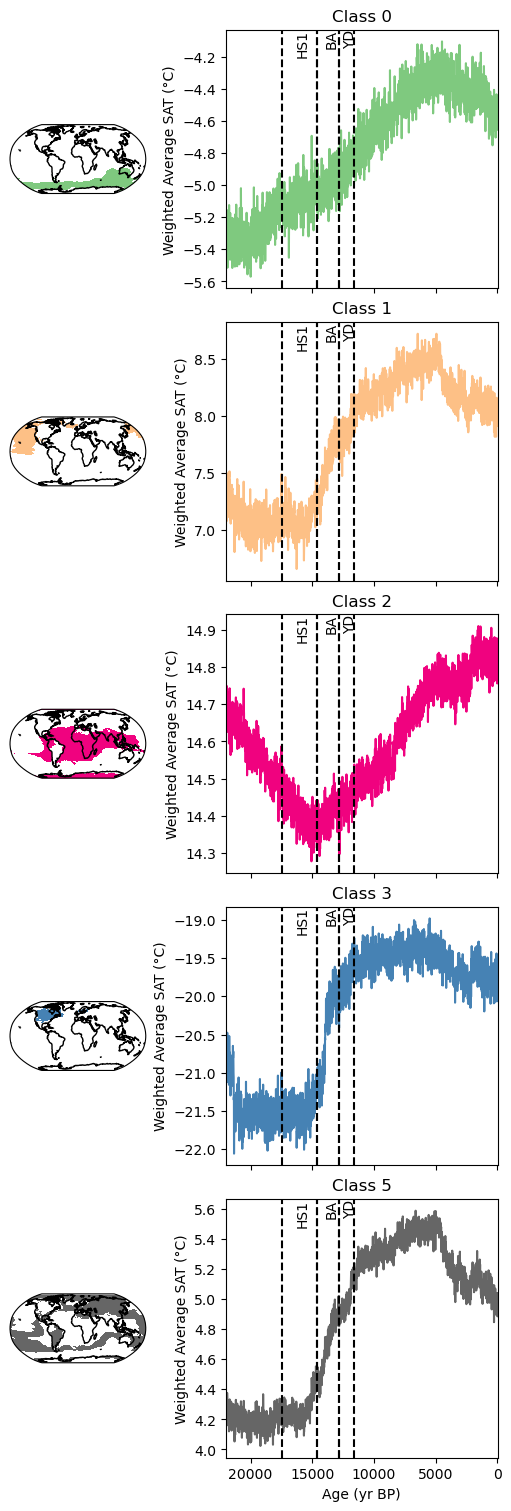

In [67]:
import xarray as xr
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gfs
import importlib
importlib.reload(gfs)



# Define the new grid to interpolate to (using ds_sat's grid)
new_lat = ds_sat.lat
new_lon = ds_sat.lon

# Perform the interpolation
ds_trace_interpolated = ds_trace_orb.interp(lat=new_lat, lon=new_lon, method='linear') # there will be nan values in the interpolated data as the spatial extend of LGMR data is larger than the TraCE data
ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
ds_trace_interpolated['class_relabeled_checked']=(('lat', 'lon'), label_check.reshape(96,144))

# 1. Center the Data
ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

# 2. Weight the Data
ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)


TraCE_orb_weighted_avg_LGMR_mask=gfs.plot_weighted_average_curve(ds_trace_interpolated.copy(),label_var_name='class_relabeled_checked', dpi=100)




# Load TraCE ice sheet data

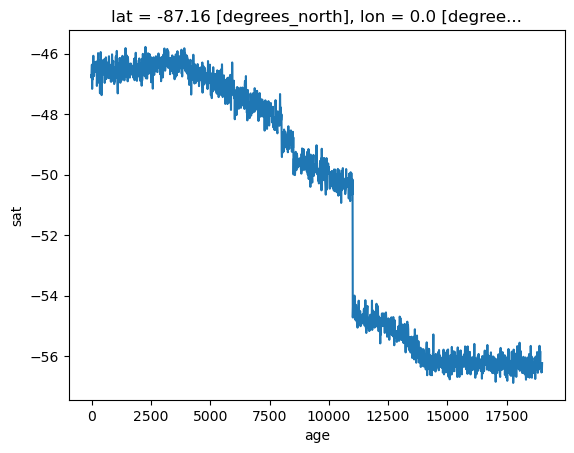

In [68]:
import xarray as xr

# import .nc data
ds_trace_icesheet = xr.open_dataset('TraCE_data/b30.00_4kaDVTz.cam2.ncrcat.ann.nc')

# rename the TREFHT to sat
ds_trace_icesheet = ds_trace_icesheet.rename({'TREFHT': 'sat'})
# rename the time to age
ds_trace_icesheet = ds_trace_icesheet.rename({'time': 'age'})
# multiply age by 1000
ds_trace_icesheet['age'] = ds_trace_icesheet['age'] * -1000

# convert the sat to degrees C
ds_trace_icesheet['sat'] = ds_trace_icesheet['sat'] - 273.15

ds_trace_icesheet = ds_trace_icesheet[['sat']]

# plot a record from the ds_sat at given lat and lon
ds_trace_icesheet['sat'].isel(lat=0, lon=0).plot()

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (1904, 13824)


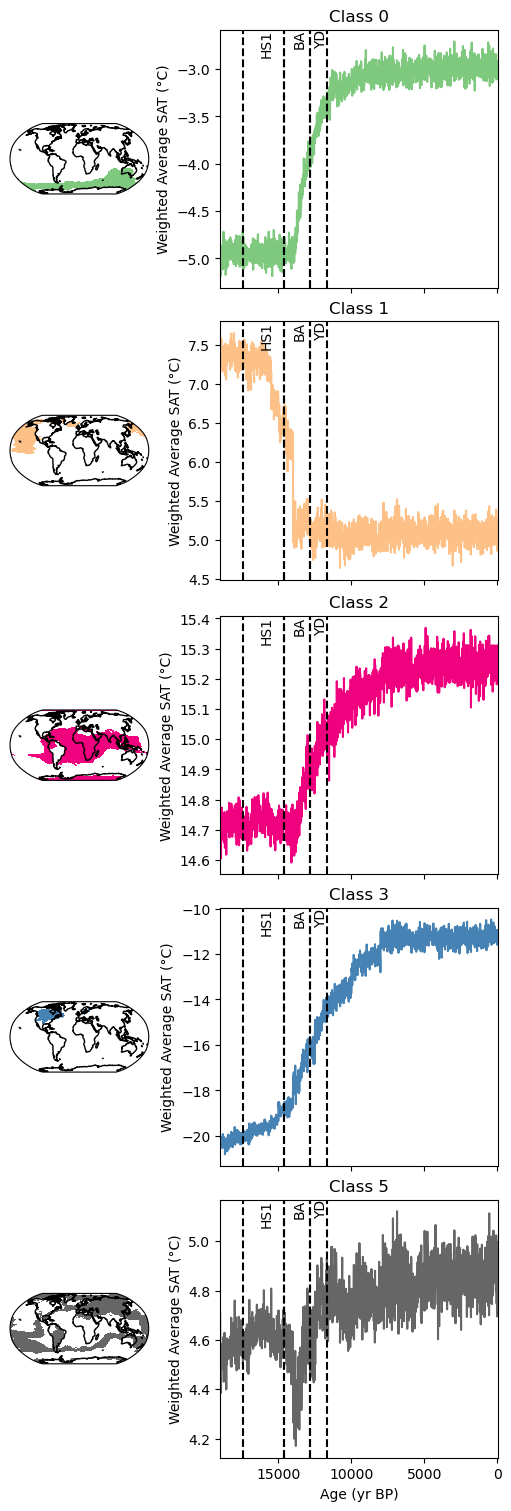

In [69]:
import xarray as xr
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gfs
import importlib
importlib.reload(gfs)



# Define the new grid to interpolate to (using ds_sat's grid)
new_lat = ds_sat.lat
new_lon = ds_sat.lon

# Perform the interpolation
ds_trace_interpolated = ds_trace_icesheet.interp(lat=new_lat, lon=new_lon, method='linear') # there will be nan values in the interpolated data as the spatial extend of LGMR data is larger than the TraCE data
ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
ds_trace_interpolated['class_relabeled_checked']=(('lat', 'lon'), label_check.reshape(96,144))

# 1. Center the Data
ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

# 2. Weight the Data
ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)


TraCE_icesheet_weighted_avg_LGMR_mask=gfs.plot_weighted_average_curve(ds_trace_interpolated.copy(),label_var_name='class_relabeled_checked', dpi=100)




# LGMR VS TraCE all

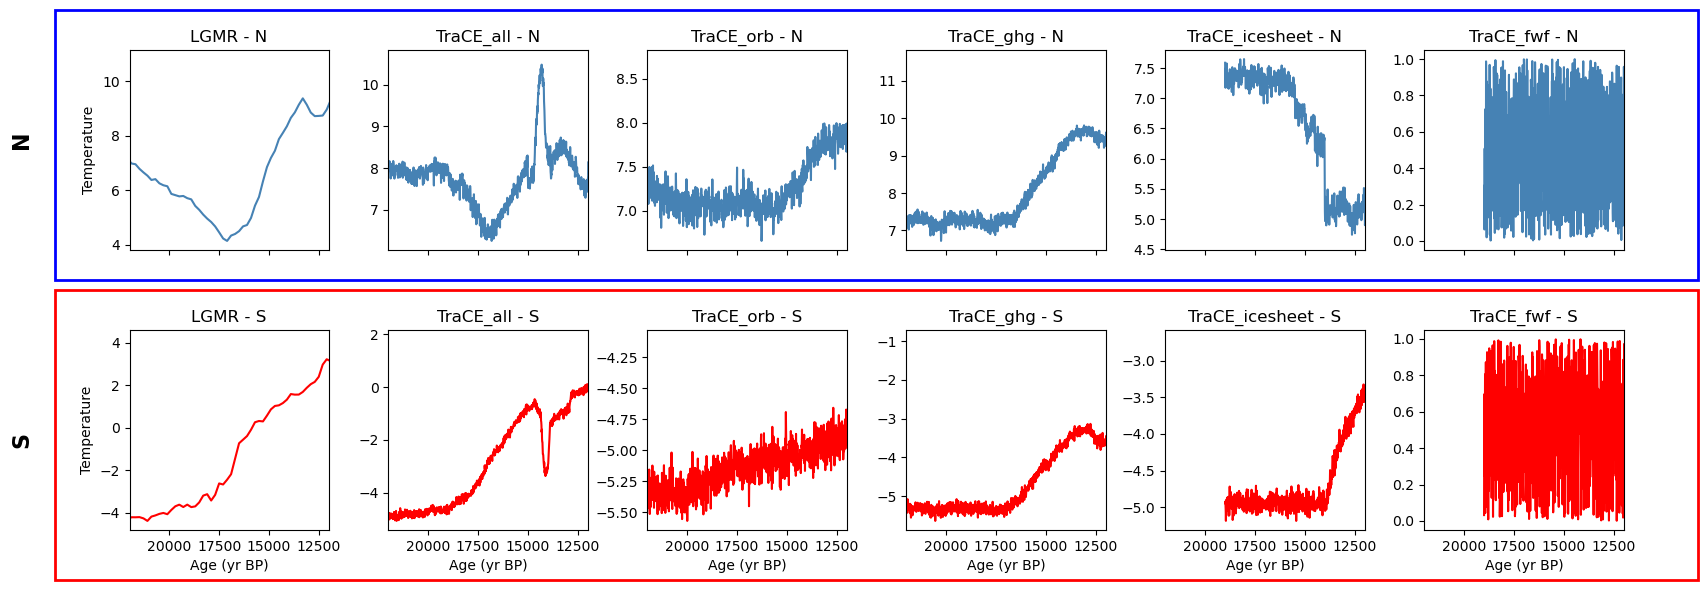

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Bbox

LGMR_S= [curves[0] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_S = np.median(LGMR_S, axis=0)

LGMR_N= [curves[1] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_N = np.median(LGMR_N, axis=0)
LGMR_age=ds_sat['age'].values

trace_all_S=TraCE_all_weighted_avg_LGMR_mask[0]
trace_all_N=TraCE_all_weighted_avg_LGMR_mask[1]
trace_age=ds_trace['age'].values

trace_orb_S=TraCE_orb_weighted_avg_LGMR_mask[0]
trace_orb_N=TraCE_orb_weighted_avg_LGMR_mask[1]
trace_orb_age=ds_trace_orb['age'].values

trace_ghg_S=TraCE_ghg_weighted_avg_LGMR_mask[0]
trace_ghg_N=TraCE_ghg_weighted_avg_LGMR_mask[1]
trace_ghg_age=ds_trace_ghg['age'].values


trace_icesheet_S=TraCE_icesheet_weighted_avg_LGMR_mask[0]
trace_icesheet_N=TraCE_icesheet_weighted_avg_LGMR_mask[1]
trace_icesheet_age=ds_trace_icesheet['age'].values

# generate some random data with shape of (len(trace_icesheet_age),)
trace_fwf_S=np.random.rand(len(trace_icesheet_age))
trace_fwf_N=np.random.rand(len(trace_icesheet_age))
trace_fwf_age=trace_icesheet_age

datasets = [
    {'name': 'LGMR', 'N': LGMR_N, 'S': LGMR_S, 'age': LGMR_age},
    {'name': 'TraCE_all', 'N': trace_all_N, 'S': trace_all_S, 'age': trace_age},
    {'name': 'TraCE_orb', 'N': trace_orb_N, 'S': trace_orb_S, 'age': trace_orb_age},
    {'name': 'TraCE_ghg', 'N': trace_ghg_N, 'S': trace_ghg_S, 'age': trace_ghg_age},
    {'name': 'TraCE_icesheet', 'N': trace_icesheet_N, 'S': trace_icesheet_S, 'age': trace_icesheet_age},
    {'name': 'TraCE_fwf', 'N': trace_fwf_N, 'S': trace_fwf_S, 'age': trace_fwf_age}
]

fig, axs = plt.subplots(2, 6, figsize=(18, 6), sharex=True, sharey=False)
plt.subplots_adjust(wspace=0.3, hspace=0.4, left=0.12, right=0.95, top=0.9, bottom=0.1)

for col, dataset in enumerate(datasets):
    for row in [0, 1]:
        ax = axs[row, col]
        if row == 0:
            data = dataset['N']
            label = dataset['name'] + ' - N'
            # ax.set_ylim(-1, 11)
        else:
            data = dataset['S']
            label = dataset['name'] + ' - S'
            # ax.set_ylim(-6, 5)
        age = dataset['age']
        
        ax.set_title(label)
        ax.set_xlim([22000, 12000])
        if col == 0:
            ax.set_ylabel('Temperature')
        if row==0:
            ax.plot(age, data,'steelblue')
        if row == 1:
            ax.plot(age, data,'r')  
            ax.set_xlabel('Age (yr BP)')

# axs[0,0].set_ylim=[2,11]


fig.text(0.06, 0.75, 'N', ha='center', va='center', fontsize=16, rotation='vertical', fontweight='bold')
fig.text(0.06, 0.25, 'S', ha='center', va='center', fontsize=16, rotation='vertical', fontweight='bold')

def add_row_rectangle(axs_row, color, alpha, lower_ratio, high_ratio=1.35):
    positions = [ax.get_position() for ax in axs_row]
    bbox = Bbox.union(positions)
    rect = Rectangle((bbox.x0-0.05*bbox.width, bbox.y0-lower_ratio*bbox.height), 1.1*bbox.width, high_ratio*bbox.height,
                     linewidth=2, edgecolor=color, facecolor='none', alpha=alpha,
                     transform=fig.transFigure, zorder=1)  # Set z-order to 1 to ensure it is above the background
    fig.add_artist(rect)

add_row_rectangle(axs[0, :], color='b', alpha=1, lower_ratio=0.15)
add_row_rectangle(axs[1, :], color='r', alpha=1, lower_ratio=0.25, high_ratio=1.45)

plt.show()


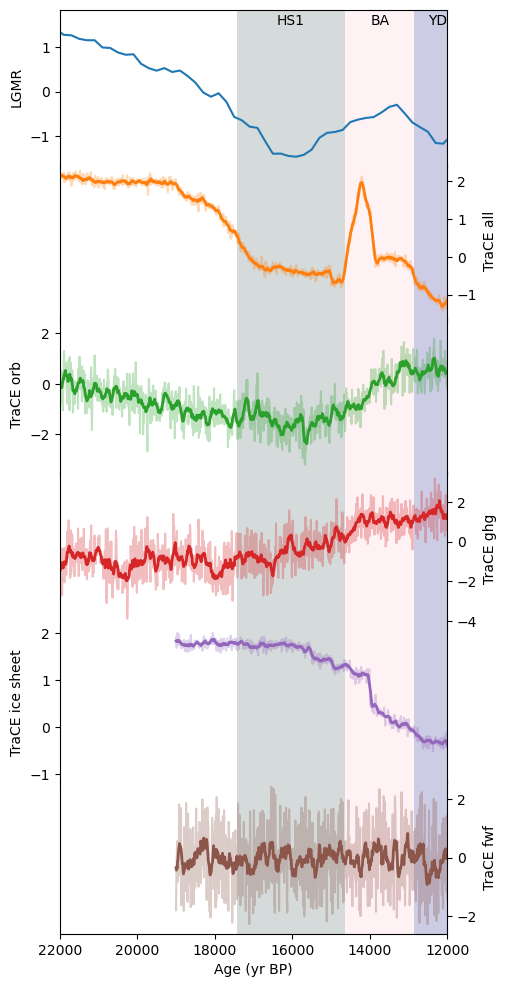

In [108]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import pandas as pd

# # Function to compute the moving average
# def moving_average(a, n=10):
#     return np.convolve(a, np.ones(n)/n, mode='same')

def moving_average(a, n=10):
    return pd.Series(a).rolling(window=n, center=True, min_periods=1).mean().values

# Compute the normalized temperature differences and their moving averages
LGMR_N_S = zscore(LGMR_N - LGMR_S)
LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

trace_all_N_S = zscore(trace_all_N - trace_all_S)
trace_all_N_S_ma = moving_average(trace_all_N_S, n=10)

trace_orb_N_S = zscore(trace_orb_N - trace_orb_S)
trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

trace_ghg_N_S = zscore(trace_ghg_N - trace_ghg_S)
trace_ghg_N_S_ma = moving_average(trace_ghg_N_S, n=10)

trace_icesheet_N_S = zscore(trace_icesheet_N - trace_icesheet_S)
trace_icesheet_N_S_ma = moving_average(trace_icesheet_N_S, n=10)

trace_fwf_N_S = zscore(trace_fwf_N - trace_fwf_S)
trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)


# LGMR_N_S = (LGMR_N - LGMR_S)
# LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

# trace_all_N_S = (trace_all_N - trace_all_S)
# trace_all_N_S_ma = moving_average(trace_all_N_S, n=10)

# trace_orb_N_S = (trace_orb_N - trace_orb_S)
# trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

# trace_ghg_N_S = (trace_ghg_N - trace_ghg_S)
# trace_ghg_N_S_ma = moving_average(trace_ghg_N_S, n=10)

# trace_icesheet_N_S = (trace_icesheet_N - trace_icesheet_S)
# trace_icesheet_N_S_ma = moving_average(trace_icesheet_N_S, n=10)

# trace_fwf_N_S = (trace_fwf_N - trace_fwf_S)
# trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)


# List of datasets and their corresponding ages and labels
datasets = [
    {'age': LGMR_age, 'data': LGMR_N_S, 'label': 'LGMR-N-S'},
    {'age': trace_age, 'data': trace_all_N_S_ma, 'label': 'TraCE_all-N-S'},
    {'age': trace_orb_age, 'data': trace_orb_N_S_ma, 'label': 'TraCE_orb-N-S'},
    {'age': trace_ghg_age, 'data': trace_ghg_N_S_ma, 'label': 'TraCE_ghg-N-S'},
    {'age': trace_icesheet_age, 'data': trace_icesheet_N_S_ma, 'label': 'TraCE_icesheet-N-S'},
    {'age': trace_fwf_age, 'data': trace_fwf_N_S_ma, 'label': 'TraCE_fwf-N-S'}
]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots: one for each dataset
fig, axes = plt.subplots(len(datasets), 1, figsize=(5, 12), sharex=True, dpi=100)

axes[0].plot(LGMR_age, LGMR_N_S, color=colors[0], alpha=1, label='LGMR-N-S')

axes[1].plot(trace_age, trace_all_N_S, color=colors[1], alpha=0.3)
axes[1].plot(trace_age, trace_all_N_S_ma, color=colors[1], label='TraCE_all-N-S', linewidth=2)

axes[2].plot(trace_orb_age, trace_orb_N_S, color=colors[2], alpha=0.3)
axes[2].plot(trace_orb_age, trace_orb_N_S_ma, color=colors[2], label='TraCE_orb-N-S', linewidth=2)

axes[3].plot(trace_ghg_age, trace_ghg_N_S, color=colors[3], alpha=0.3)
axes[3].plot(trace_ghg_age, trace_ghg_N_S_ma, color=colors[3], label='TraCE_ghg-N-S', linewidth=2)

axes[4].plot(trace_icesheet_age, trace_icesheet_N_S, color=colors[4], alpha=0.3)
axes[4].plot(trace_icesheet_age, trace_icesheet_N_S_ma, color=colors[4], label='TraCE_icesheet-N-S', linewidth=2)

axes[5].plot(trace_fwf_age, trace_fwf_N_S, color=colors[5], alpha=0.3)
axes[5].plot(trace_fwf_age, trace_fwf_N_S_ma, color=colors[5], label='TraCE_fwf-N-S', linewidth=2)

ylabel_list=['LGMR','TraCE all','TraCE orb','TraCE ghg','TraCE ice sheet','TraCE fwf']

# Plot each dataset in its own subplot
for i, dataset in enumerate(datasets):
    ax = axes[i]
    # ax.plot(dataset['age'], dataset['data'], color=colors[i % len(colors)], label=dataset['label'])
    ax.set_ylabel(ylabel_list[i])
    # ax.set_title(dataset['label'])
    # ax.legend(loc='upper right')
    # ax.legend()
    ax.set_xlim([22000, 12000])
    
    if i % 2 == 0:
        ax.yaxis.tick_left()
        ax.yaxis.set_label_position("left")
    else:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
    
# Hide x-axis labels for all but the last subplot
    if i>0:
        ax.spines['top'].set_visible(False)
    if i < len(datasets) - 1:
        ax.tick_params(labelbottom=False)
        # set the bottom spine invisible
        ax.spines['bottom'].set_visible(False)
    else:
        ax.set_xlabel('Age (yr BP)')

# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)

for ax in axes:
    add_grey_bars(ax)

axes[0].text(x=np.mean(HS1), y=0.95 * np.max(axes[0].get_ylim()), s='HS1', ha='center', va='top')
axes[0].text(x=np.mean(BA), y=0.95 * np.max(axes[0].get_ylim()), s='BA', ha='center', va='top')
axes[0].text(x=np.mean(YD), y=0.95 * np.max(axes[0].get_ylim()), s='YD', ha='center', va='top')

# Adjust layout to remove space between subplots
plt.subplots_adjust(hspace=0)

plt.show()


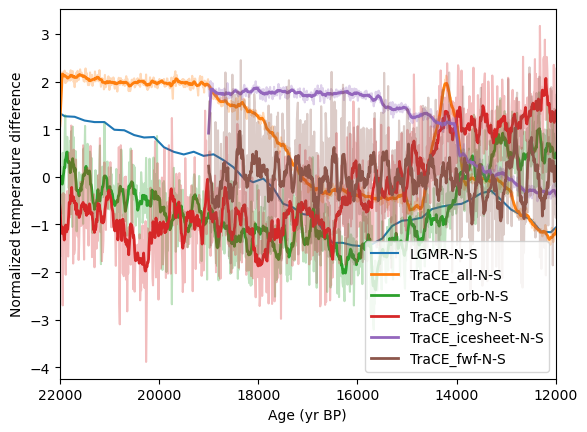

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Function to compute the moving average
def moving_average(a, n=10):
    return np.convolve(a, np.ones(n)/n, mode='same')

# Compute the normalized temperature differences and their moving averages
LGMR_N_S = zscore(LGMR_N - LGMR_S)
LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

trace_all_N_S = zscore(trace_all_N - trace_all_S)
trace_all_N_S_ma = moving_average(trace_all_N_S, n=10)

trace_orb_N_S = zscore(trace_orb_N - trace_orb_S)
trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

trace_ghg_N_S = zscore(trace_ghg_N - trace_ghg_S)
trace_ghg_N_S_ma = moving_average(trace_ghg_N_S, n=10)

trace_icesheet_N_S = zscore(trace_icesheet_N - trace_icesheet_S)
trace_icesheet_N_S_ma = moving_average(trace_icesheet_N_S, n=10)

trace_fwf_N_S = zscore(trace_fwf_N - trace_fwf_S)
trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)

# Plot the data
fig, ax = plt.subplots()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(LGMR_age, LGMR_N_S, color=colors[0], alpha=1, label='LGMR-N-S')
# ax.plot(LGMR_age, LGMR_N_S_ma, color=colors[0], label='LGMR-N-S', linewidth=2)

ax.plot(trace_age, trace_all_N_S, color=colors[1], alpha=0.3)
ax.plot(trace_age, trace_all_N_S_ma, color=colors[1], label='TraCE_all-N-S', linewidth=2)

ax.plot(trace_orb_age, trace_orb_N_S, color=colors[2], alpha=0.3)
ax.plot(trace_orb_age, trace_orb_N_S_ma, color=colors[2], label='TraCE_orb-N-S', linewidth=2)

ax.plot(trace_ghg_age, trace_ghg_N_S, color=colors[3], alpha=0.3)
ax.plot(trace_ghg_age, trace_ghg_N_S_ma, color=colors[3], label='TraCE_ghg-N-S', linewidth=2)

ax.plot(trace_icesheet_age, trace_icesheet_N_S, color=colors[4], alpha=0.3)
ax.plot(trace_icesheet_age, trace_icesheet_N_S_ma, color=colors[4], label='TraCE_icesheet-N-S', linewidth=2)

ax.plot(trace_fwf_age, trace_fwf_N_S, color=colors[5], alpha=0.3)
ax.plot(trace_fwf_age, trace_fwf_N_S_ma, color=colors[5], label='TraCE_fwf-N-S', linewidth=2)

ax.legend()
ax.set_xlim([22000, 12000])
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('Normalized temperature difference')

plt.show()


Text(0, 0.5, 'Normalized temperature difference')

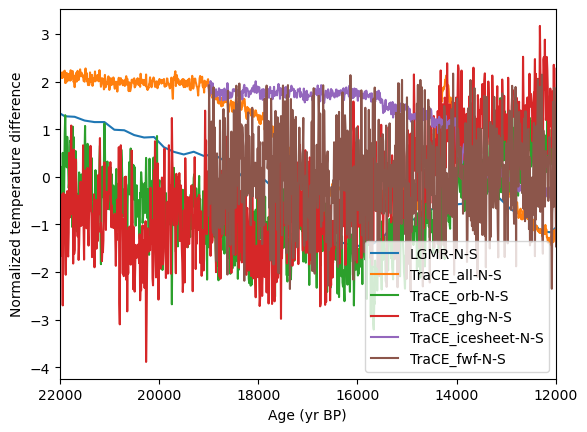

In [20]:
import numpy as np

LGMR_S= [curves[0] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_S = np.median(LGMR_S, axis=0)

LGMR_N= [curves[1] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_N = np.median(LGMR_N, axis=0)
LGMR_age=ds_sat['age'].values

trace_all_S=TraCE_all_weighted_avg_LGMR_mask[0]
trace_all_N=TraCE_all_weighted_avg_LGMR_mask[1]
trace_age=ds_trace['age'].values

trace_orb_S=TraCE_orb_weighted_avg_LGMR_mask[0]
trace_orb_N=TraCE_orb_weighted_avg_LGMR_mask[1]
trace_orb_age=ds_trace_orb['age'].values

trace_ghg_S=TraCE_ghg_weighted_avg_LGMR_mask[0]
trace_ghg_N=TraCE_ghg_weighted_avg_LGMR_mask[1]
trace_ghg_age=ds_trace_ghg['age'].values


trace_icesheet_S=TraCE_icesheet_weighted_avg_LGMR_mask[0]
trace_icesheet_N=TraCE_icesheet_weighted_avg_LGMR_mask[1]
trace_icesheet_age=ds_trace_icesheet['age'].values

# generate some random data with shape of (len(trace_icesheet_age),)
trace_fwf_S=np.random.rand(len(trace_icesheet_age))
trace_fwf_N=np.random.rand(len(trace_icesheet_age))
trace_fwf_age=trace_icesheet_age




# plot N minor S
import matplotlib.pyplot as plt
from scipy.stats import zscore
fig, ax = plt.subplots()


LGMR_N_S = zscore(LGMR_N - LGMR_S)
trace_all_N_S = zscore(trace_all_N - trace_all_S)
trace_orb_N_S = zscore(trace_orb_N - trace_orb_S)
trace_ghg_N_S = zscore(trace_ghg_N - trace_ghg_S)
trace_icesheet_N_S = zscore(trace_icesheet_N - trace_icesheet_S)
trace_fwf_N_S = zscore(trace_fwf_N - trace_fwf_S)


ax.plot(LGMR_age, LGMR_N_S, label='LGMR-N-S')
ax.plot(trace_age, trace_all_N_S, label='TraCE_all-N-S')
ax.plot(trace_orb_age, trace_orb_N_S, label='TraCE_orb-N-S')
ax.plot(trace_ghg_age, trace_ghg_N_S, label='TraCE_ghg-N-S')
ax.plot(trace_icesheet_age, trace_icesheet_N_S, label='TraCE_icesheet-N-S')
ax.plot(trace_fwf_age, trace_fwf_N_S, label='TraCE_fwf-N-S')

ax.legend()
# set x limit
ax.set_xlim([22000, 12000])
# x and y label
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('Normalized temperature difference')



